In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

np.random.seed(123)

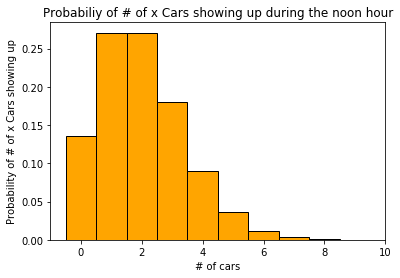

In [2]:
# question 1
x = range(10)
y = stats.poisson(2).pmf(x)

plt.title("Probabiliy of # of x Cars showing up during the noon hour")
plt.xlabel("# of cars")
plt.ylabel("Probability of # of x Cars showing up")
plt.bar(x, y, color="orange", edgecolor="black", width=1)
plt.show()

In [3]:
theory = stats.poisson(2).pmf(0)
simulated = (stats.poisson(2).rvs(10_000) == 0).mean()
theory,simulated

(0.1353352832366127, 0.1353)

In [4]:
theory = stats.poisson(2).sf(2)
simulated = (stats.poisson(2).rvs(10_000) >= 3).mean()
theory, simulated

(0.32332358381693654, 0.3261)

In [5]:
theory = stats.poisson(2).sf(0)
simulated = (stats.poisson(2).rvs(10_000) >= 1).mean()
theory, simulated

(0.8646647167633873, 0.8635)

In [6]:
# question 2
grade_distribution = stats.norm(3, .3)
top_five_grades = grade_distribution.isf(.05)
simulated = np.percentile(grade_distribution.rvs(10_000), 95)
top_five_grades, simulated

(3.4934560880854417, 3.492619473010303)

In [7]:
bottom_15_GPA = grade_distribution.ppf(.15)
simulated = np.percentile(grade_distribution.rvs(10_000), 15)
bottom_15_GPA, simulated

(2.689069983151863, 2.6886204904286104)

In [8]:
gpa = 2.8
theory = grade_distribution.ppf(.2) < gpa < grade_distribution.ppf(.3)
simulated = np.percentile(grade_distribution.rvs(10_000), 20) < gpa < np.percentile(grade_distribution.rvs(10_000), 30)
theory, simulated

(True, True)

In [9]:
theory = grade_distribution.cdf(3.5)
simulated = (grade_distribution.rvs(10_000) <= 3.5).mean()
theory, simulated

(0.9522096477271853, 0.9525)

In [10]:
# question 3
clicks_distribution = stats.binom(4326, .02)
theory = clicks_distribution.sf(96)
simulation = (clicks_distribution.rvs(100_00) >= 97).mean()
theory, simulation

(0.1397582363130086, 0.145)

In [11]:
# question 4
n = 60
probability = .01
theory = stats.binom(n, probability).sf(0)
simulation = (stats.binom(n, probability).rvs(10_000) > 0).mean()
theory, simulation

(0.4528433576092388, 0.4592)

In [12]:
#  question 5
n_students = round(.9 * 3 * 22)
theory = stats.binom(n_students, .03).sf(0)
simulation = (stats.binom(n_students, .03).rvs(100_00) > 0).mean()
theory, simulation

(0.8342199288437355, 0.8348)

In [13]:
n_days = 2
(1-theory) ** n_days, (1-simulation) ** n_days

(0.027483031992576113, 0.027291040000000006)

In [14]:
n_days = 5
(1-theory) ** n_days, (1-simulation) ** n_days

(0.0001252165138809122, 0.00012304110277932038)

In [15]:
#  question 6
time_to_order_and_eat = 2 + 10 + 15
time_for_lunch = 60
max_time_to_wait = time_for_lunch - time_to_order_and_eat
max_time_to_wait

33

In [16]:
avg_wait = 15 * 2 
sd = 3 * 2 
theory = stats.norm(avg_wait, sd).cdf(max_time_to_wait)
simulated = (stats.norm(avg_wait, sd).rvs(10_000) <= max_time_to_wait).mean()
theory, simulated

(0.6914624612740131, 0.6893)

In [17]:
#  question 7
from env import get_db_url
query = """
    select emp_no, salary from salaries 
    join dept_emp using(emp_no)
    where salaries.to_date > curdate() 
    and dept_emp.to_date > curdate()
    """

url = get_db_url("employees")
df = pd.read_sql(query, url)
salaries = df.set_index("emp_no")

In [18]:
avg = salaries.mean()["salary"]
stdev = salaries.std()["salary"]
avg, stdev

(72012.23585730705, 17309.995380251985)

In [19]:
theory = stats.norm(avg, stdev).cdf(60_000)
actual = (salaries <= 60_000).mean()["salary"]
theory, actual

(0.24385742480214434, 0.270614349252886)

In [20]:
theory = stats.norm(avg, stdev).sf(95_000)
actual = (salaries > 95_000).mean()["salary"]
theory, actual

(0.09208819199804058, 0.1086272092752078)

In [21]:
actual = ((salaries < 80_000) & (salaries > 65_000)).mean()["salary"]

above_65 = stats.norm(avg, stdev).sf(65_000)
above_80 = stats.norm(avg, stdev).sf(80_000)
theory = above_65 - above_80
theory, actual

(0.3350605685446666, 0.325107028035515)

In [22]:
theory = stats.norm(avg, stdev).isf(.05)
actual = salaries.quantile(.95)["salary"]
theory, actual

(100484.64454102777, 104225.84999999998)